# Data Exploration

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def filter_datetime(string):
    return string.split('+')[0]

In [3]:
data = pd.read_csv("~/Downloads/sleep.csv")
data['sleep'] = data['sleep'].apply(lambda x: filter_datetime(x))
data['sleep_dt'] = data['sleep'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['wake'] = data['wake'].apply(lambda x: filter_datetime(x))
data['wake_dt'] = data['wake'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['sleep_hours'] = data['wake_dt'] - data['sleep_dt']
data['sleep_hours'] = data['sleep_hours'].apply(lambda x: x.total_seconds() / 60 / 60)

In [4]:
data['sleep_hours'].mean()

7.577058644788818

In [5]:
type(data['sleep_hours'][0])

numpy.float64

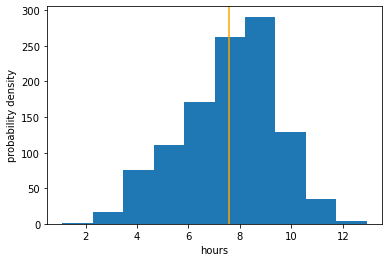

In [6]:
fig, ax = plt.subplots()
ax.hist(data['sleep_hours'])
ax.set_xlabel('hours')
ax.set_ylabel('probability density')
ax.axvline(data['sleep_hours'].mean(), color='orange')

In [7]:
data['day'] = data['wake_dt'].apply(lambda x: x.weekday()) 

In [8]:
data.groupby('day').mean()

,exercise_hours,mood,sleep_hours
day,,,
0,1.617333,5.708955,8.478875
1,0.112263,5.496269,7.867410
2,0.069590,5.500000,7.906838
3,1.681496,5.792683,8.605769
4,0.108321,5.671756,7.686518
5,0.115077,5.576923,5.816348
6,1.242932,5.330769,6.686306


In [9]:
# datetime.strptime(date_string, format)
data['sleep'][0]

'2016-01-01 05:28:00'

In [10]:
filter_datetime('2016-01-01 05:28:00+00:00')

'2016-01-01 05:28:00'

In [11]:
import datetime

In [12]:
sleep1 = datetime.datetime.strptime(data['sleep'][0],'%Y-%m-%d %H:%M:%S')
wake1 = datetime.datetime.strptime(data['wake'][0],'%Y-%m-%d %H:%M:%S')

In [13]:
(wake1 - sleep1).total_seconds()

23640.0

In [14]:
# data['sleep_hours'] = data['wake'] - data['sleep']

In [15]:
import pandas as pd
import numpy as np

In [16]:
data = pd.read_csv("~/Downloads/trees.csv")
train = data.iloc[:500,:]
test = data.iloc[500:,:]

print(train.shape)
print(test.shape)

(500, 5)
(250, 5)


In [17]:
class Node:
    def __init__(self, column: int, split_value: float, left_subtree, right_subtree):
        """Create node

        Arguments:
            column (int):
            split_value (float):
            left_subtree (Union[Leaf, Node]):
            right_subtree (Union[Leaf, Node])
        """
        self.column = column
        self.split_value = split_value
        self.left_subtree = left_subtree
        self.right_subtree = right_subtree

class Leaf:
    def __init__(self, label):
        self.label = label

def predict(root, x):
    """Predicts

    Arguments:
        root (Node, Leaf):
        x (np.array): vector of input features
    """
#     if not root:
#         return

    # check if leaf or node
    if isinstance(root, Node):
        if x[root.column]<= root.split_value:
            predict(root.left_subtree, x)

        else: # x[root.column]> root.split_value:
            predict(root.right_subtree, x)
    else: # if is leaf
        return root.label

In [18]:
tree = Node(0, 5.6, Leaf(0), Node(2, 5.0, Leaf(1), Leaf(2)))
x = train.iloc[0,:-1]
predict(tree, x)